In [1]:
import pandas as pd
import folium
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('london_crime_by_lsoa.csv')
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [3]:
df.isna().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

# A. Area Plot

**Question**  // Bagaimana tren jumlah terjadinya kejahatan pada 3 wilayah dengan jumlah kejahatan terbanyak di London? 

**Pre-processing as needed**

In [4]:
a = df[['borough','value']].groupby(['borough'],as_index=False).agg({'value':'sum'}, index=False).sort_values(by='value', ascending=False)
a.head(3)

,borough,value
32,Westminster,455028
21,Lambeth,292178
27,Southwark,278809


In [5]:
a1 = df[['borough','value','year']].groupby(['borough','year'],as_index=False).agg({'value':'sum'}, index=False).sort_values(by='value', ascending=False)
a1

,borough,year,value
292,Westminster,2012,59226
291,Westminster,2011,54243
293,Westminster,2013,53852
289,Westminster,2009,48456
296,Westminster,2016,48330
...,...,...,...
59,City of London,2013,110
57,City of London,2011,69
54,City of London,2008,0
55,City of London,2009,0


In [6]:
a11 = a1[a1['borough']=='Westminster'][['year','value']]
a11 = a11.rename(columns={'value':'Westminster'})
a11['Lambeth'] = a1[(a1['borough'] == 'Lambeth')]['value'].to_list()
a11['Southwark'] = a1[(a1['borough'] == 'Southwark')]['value'].to_list()
a11.sort_values(by='year',inplace=True)
a11.set_index('year',inplace=True)
a11

,Westminster,Lambeth,Southwark
year,,,
2008,47846,31717,30623
2009,48456,33164,31128
2010,48116,31765,30723
2011,54243,33473,31636
2012,59226,34071,33470
2013,53852,33224,31320
2014,47564,31671,30260
2015,47395,31225,28912
2016,48330,31868,30737


**Create data visualization**

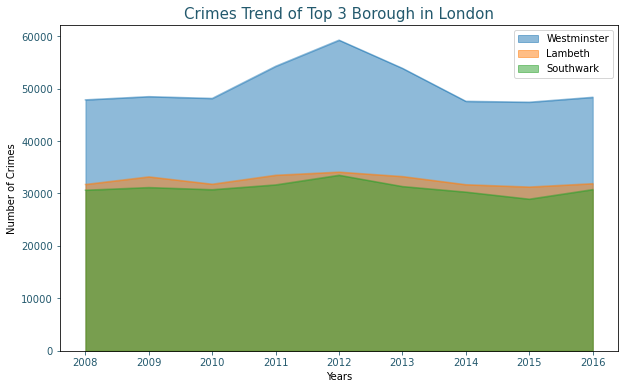

In [7]:
a11.plot(kind='area', stacked=False, figsize=(10, 6))
plt.title('Crimes Trend of Top 3 Borough in London', loc='center',size ='15',color='#23596D')
plt.ylabel('Number of Crimes')
plt.xlabel('Years')
plt.tick_params(colors='#23596D', which='both')
plt.show()

**Conclusion**

3 wilayah dengan jumlah kejahatan terbanyak di London selama tahun 2008 - 2016 adalah Westminster, Lambeth, dan Southwark. Dapat dilihat berdasarkan visualisasi di atas bahwa tahun dengan tingkat kejahatan tertinggi adalah 2012.

# B. Histogram

**Question**  // Bagaimana distribusi kasus kejahatan Drugs di London? 

In [20]:
b1 = df[df['major_category']=='Drugs']

In [22]:
b2 = b1[['value','year']].groupby(['year'], as_index=False).agg({'value':'sum'})
b2

,year,value
0,2008,68804
1,2009,60549
2,2010,58674
3,2011,57550
4,2012,51776
5,2013,50278
6,2014,44435
7,2015,39785
8,2016,38914


Text(0.5, 1.0, 'Distribusi dari Kejahatan Jenis Drugs di London')

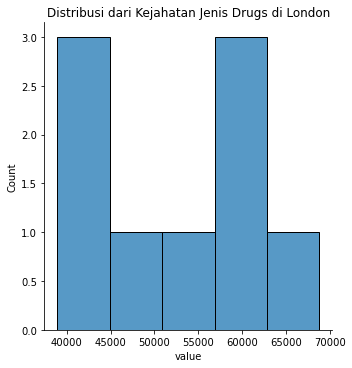

In [25]:
sns.displot(data=b2, x="value")
plt.title('Distribusi dari Kejahatan Jenis Drugs di London')

In [26]:
b2.value.skew()

0.0928243138007096

**Conclusion**

Distribusi data dengan tipe kejahatan Drugs di London bersifat Simetris karena skewness nya berada di rentang -0.5 sampai 0.5.

# C. Bar Chart

**Question**  // Bagaimana tren jumlah terjadinya kejahatan Theft and Handling pada seluruh wilayah di London dari tahun 2008-2016? 

**Pre-processing as needed**

In [8]:
c1 = df[df['major_category']=='Theft and Handling']

In [9]:
c = c1[['year','value']].groupby(['year'],as_index=True).agg({'value':'sum'}, index=False).sort_values(by='year')
c

,value
year,
2008,283692
2009,279492
2010,290924
2011,309292
2012,334054
2013,306372
2014,279880
2015,284022
2016,294133


**Create data visualization**

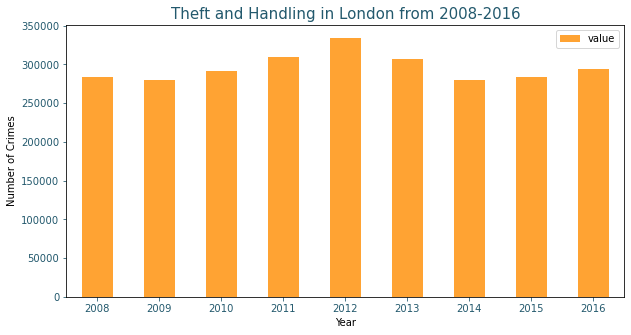

In [10]:
c.plot(kind='bar',figsize=(10,5),rot=0,color=['darkorange'],alpha=0.8)
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Theft and Handling in London from 2008-2016', loc='center',size ='15',color='#23596D')
plt.tick_params(colors='#23596D', which='both')

**Conclusion**

Jumlah kriminalitas Theft and Handling tidak meningkat setiap tahun. Tahun dengan jumlah kriminalitas Theft and Handling tertinggi adalah 2012

# D. Pie Chart

**Question**  // Bagaimanakah proporsi major category dari crimes di London?

**Pre-processing as needed**

In [11]:
d = df[['major_category','value']].groupby(['major_category'],as_index=True).agg({'value':'sum'}, index=False).sort_values(by='value', ascending=False).head(5)
d

,value
major_category,
Theft and Handling,2661861
Violence Against the Person,1558081
Burglary,754293
Criminal Damage,630938
Drugs,470765


**Create data visualization**

No handles with labels found to put in legend.


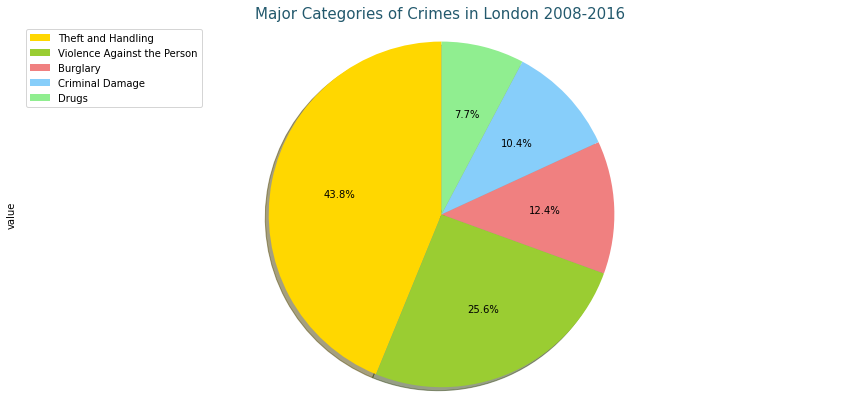

In [12]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','lightgreen', 'pink','orange','red','green']
d.plot(kind='pie',figsize=(15, 7),autopct='%1.1f%%',startangle=90,shadow=True,subplots=True,colors=colors_list,labels=None)
plt.title('Major Categories of Crimes in London 2008-2016', loc='center',size ='15',color='#23596D')
plt.axis('equal')
plt.legend(labels=d.index, loc='upper left')
plt.show()

**Conclusion**

Proporsi terbesar dari major category dari crimes di London ada pada kategori Theft and Handling

# E. Box Plot

**Question**  // Bagaimana skewness pada kasus Theft and Handling di wilayah Westminster

**Pre-processing as needed**

In [13]:
e = df[(df['borough']=='Westminster')&(df['major_category']=='Theft and Handling')][['major_category','value','year']]
e

,major_category,value,year
21,Theft and Handling,0,2012
134,Theft and Handling,1,2014
165,Theft and Handling,0,2015
187,Theft and Handling,3,2013
227,Theft and Handling,6,2016
...,...,...,...
13490016,Theft and Handling,0,2010
13490133,Theft and Handling,2,2016
13490346,Theft and Handling,1,2008
13490545,Theft and Handling,17,2012


In [14]:
e1 = e[['major_category','value','year']].groupby(['major_category','year'], as_index=False).agg({'value':'sum'})
e1.set_index('year',inplace=True)
e1

,major_category,value
year,,
2008,Theft and Handling,29266
2009,Theft and Handling,29967
2010,Theft and Handling,29191
2011,Theft and Handling,33529
2012,Theft and Handling,38152
2013,Theft and Handling,33868
2014,Theft and Handling,28144
2015,Theft and Handling,27980
2016,Theft and Handling,27520


**Create data visualization**

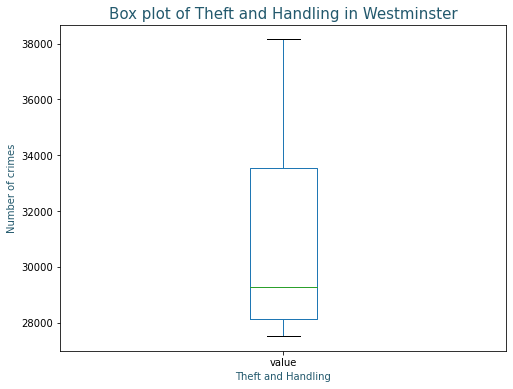

In [15]:
e1.plot(kind='box',figsize=(8,6))
plt.title('Box plot of Theft and Handling in Westminster', loc='center',size ='15',color='#23596D')
plt.ylabel('Number of crimes',color='#23596D')
plt.xlabel('Theft and Handling',color='#23596D')
plt.show()

**Conclusion**

Tidak terdapat outliers pada kasus Theft and Handling di wilayah Westminster. Selain itu, boxplot juga menunjukkan data kasus Theft and Handling di wilayah Westminster tersebar secara right skewed.

# F. Scatter Plot

**Question**  // Bagaimana perkembangan total kasus kriminalitas di London dari tahun 2008-2016

**Pre-processing as needed**

In [16]:
f = df[['year','value']].groupby(['year'],as_index=False).agg({'value':'sum'}, index=False).sort_values(by='year')
f

,year,value
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


**Create data visualization**

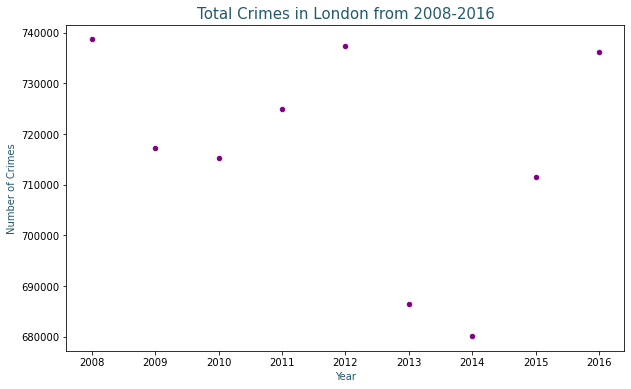

In [17]:
f.plot(kind='scatter',x='year',y='value',figsize=(10,6),color = 'purple')
plt.title('Total Crimes in London from 2008-2016', loc='center',size ='15',color='#23596D')
plt.xlabel('Year',color='#23596D')
plt.ylabel('Number of Crimes',color='#23596D')
plt.show()

**Conclusion**

Terjadi penurunan yang signifikan pada total crimes di London dari tahun 2012 ke 2013 dan 2014.

# G. Word Clouds

**Question**  // Minor Category apakah dengan jumlah terbanyak di London ?

In [27]:
from wordcloud import WordCloud, STOPWORDS

In [28]:
stopwords = set(STOPWORDS)

In [32]:
wc = WordCloud(background_color = 'white',stopwords=stopwords).generate(str(df.minor_category.values))

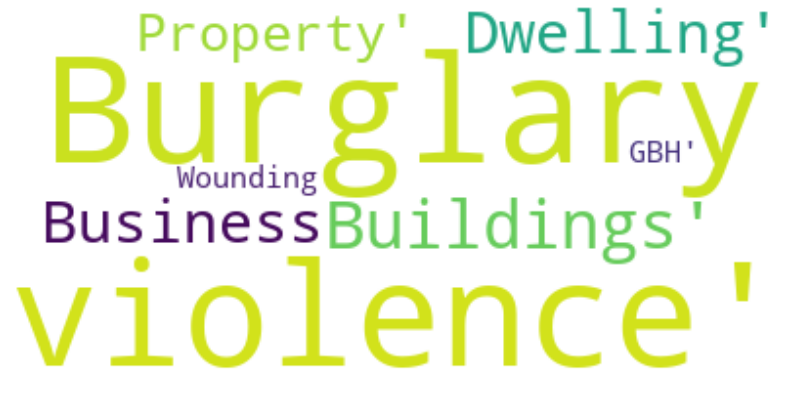

In [34]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(wc, interpolation ='bilinear')
plt.axis('off')
plt.show()

**Conclusion**

Berdasarkan plotting di atas, minor category dengan jumlah terbanyak adalah 'Burglary' lalu diikuti oleh 'violence'